# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

Инструкция по выполнению проекта
* 		Откройте файл с данными и изучите его. Путь к файлу: /datasets/users_behavior.csv. Скачать датасет
* 		Разделите исходные данные на обучающую, валидационную и тестовую выборки.
* 		Исследуйте качество разных моделей, меняя гиперпараметры. Кратко напишите выводы исследования.
* 		Проверьте качество модели на тестовой выборке.
* 		Дополнительное задание: проверьте модели на вменяемость. Ничего страшного, если не получится: эти данные сложнее тех, с которыми вы работали раньше. В следующем курсе подробнее об этом расскажем.
#### Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.

## Обозначения
* 		сalls — количество звонков,
* 		minutes — суммарная длительность звонков в минутах,
* 		messages — количество sms-сообщений,
* 		mb_used — израсходованный интернет-трафик в Мб,
* 		is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from fast_ml.model_development import train_valid_test_split
!pip install fast_ml

## Откройте и изучите файл

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


##### Вывод:
Так как мы ранее проводили анализ данных и заполняли все пропуски,считаю не нужным углубляться в данные слишком глубоко.


In [4]:
print(df['calls'].corr(df['minutes']))

0.9820832355742288


In [5]:
df = df.drop('minutes',axis=1)


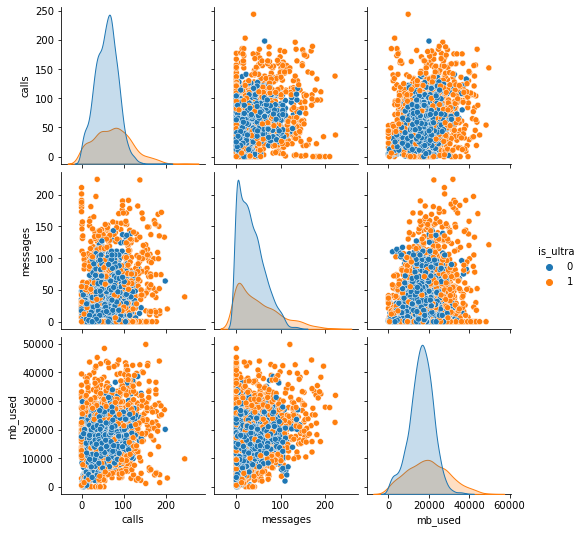

In [6]:
sns.pairplot(df,hue='is_ultra');

## Разбейте данные на выборки

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
!pip install fast_ml
from fast_ml.model_development import train_valid_test_split

In [8]:
#разберем все по признакам 
features = df.drop(['is_ultra'],axis = 1)
target = df['is_ultra']

In [9]:
#разобьем все на обучающую, валидационную и тестовую выборки.
features_train,features_test,target_train,target_test = train_test_split(features,
                                                                           target,
                                                                           test_size=0.4,
                                                                           random_state=12345)                                                                                                                            
                                                       

In [10]:
print(features_train.shape)
print(target_train.shape)

(1928, 3)
(1928,)


In [11]:
features_valid,features_test,target_valid,target_test=train_test_split(features_test,
                                                                    target_test,
                                                                    test_size=0.5,
                                                                    random_state=12345
                                          )
 

In [12]:
print(features_test.shape)
print(target_test.shape)

(643, 3)
(643,)


In [13]:
print(features_valid.shape)
print(target_valid.shape)

(643, 3)
(643,)


## Исследуйте модели

In [14]:
scaler = StandardScaler()
scaler.fit(features_train) 

X_train = scaler.transform(features_train)
X_valid = scaler.transform(features_valid)
X_test = scaler.transform(features_test)

Исследуем модель решающего  дерева

In [15]:
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    result =  accuracy_score (target_valid, predictions_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

In [16]:
print("Лучшее accuracy на валидационной выборке:", best_result)

Лучшее accuracy на валидационной выборке: 0.7900466562986003


Исследуем модель случайного леса

In [17]:
best_model = None
best_result = 0
best_depth = 0
for x in range(1, 11):
    for depth in range(1, 11):
        model = RandomForestClassifier(random_state=12345,max_depth=depth,n_estimators=x)
        model.fit(features_train,target_train)
        predictions_valid = model.predict(features_valid)
        result =  accuracy_score (target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_x = x
            best_result = result
            best_depth = depth
        


In [18]:
print("Лучшее accuracy на валидационной выборке:", best_result)
print('лучшее кол-во деревьев',best_x)
print('Лучшая глубина ',best_depth)

Лучшее accuracy на валидационной выборке: 0.8009331259720062
лучшее кол-во деревьев 5
Лучшая глубина  7


Исследуем моделm логической регрессии 

In [19]:
model = StandardScaler()
model.fit(features_train) 

features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test)

In [20]:
model = LogisticRegression(random_state=12345,solver='newton-cg',max_iter=1000)
model.fit(features_train,target_train)
predictions_valid = model.predict(features_valid)
result =  accuracy_score (target_valid, predictions_valid)


In [21]:
print("Лучшее accuracy на валидационной выборке:", result)

Лучшее accuracy на валидационной выборке: 0.7511664074650077


### Вывод

Лучший показатель мы получили от модели случайного леса, на ней мы и будем проверять тестовую выборку.

## Проверьте модель на тестовой выборке

In [22]:
model_win = RandomForestClassifier(random_state=12345,max_depth=7,n_estimators=5)
model_win.fit(features_train,target_train)
win_predict = model_win.predict(features_test)
accuracy_win = accuracy_score(win_predict,target_test)
print(accuracy_win)

0.7916018662519441


### Вывод

Из исследуемых моделей лучше всего,на валидационной выбрке,себя показала модель случайного леса с показателем в 0.8009331259720062
На тестовой выборке модель случайного леса покакзала очень хороший результат в 0.7916018662519441

## Чек-лист готовности проекта

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [X] Выполнено задание 2: данные разбиты на три выборки
- [X] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
